In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from itertools import product
import svgutils.transform as sg
from PIL import Image, ImageDraw, ImageFont
import os
from IPython.display import HTML
import matplotlib.animation as animation
%matplotlib inline
from tqdm import tqdm
import imageio

## generateur de markov 
La fonction np.random.choice(states, p ) nous permet de choisir une état au hasard en respectant les probabilités p

In [12]:
import numpy as np

def markov_chain(states : np.array, transitions : np.array, size ):
    """ generateur de Markov
        
        states (np.array): Vecteurs des états possible ["A","C","G",T] 
        transitions (np.array): Matrice des transitions possibles 
        size: longueur de la sequence 
     """ 
    
    # On verifie  que la dimension de la matrice de transitions est compatible avec le vecteur d'état

    if states.shape * 2 != transitions.shape:
        raise AttributeError("La matrix transition n'est pas compatible avec states")
    
    # On choisi au hasard le premier symbole . ( ex: A)
    current  = np.random.choice(states)

    for _ in range(size):
        # On récupère la position du symbole 
        current_index = int(np.where(states == current)[0])
        # On récupère les transitions possible pour le symbole en cours
        current_transition = transitions[current_index]
        # On choisi au au hasard le prochain état en respectant le probabilités de transitions
        current = np.random.choice(states, p = current_transition)
        
        
        yield current


# 4 états possibles
states = np.array(["A","C","G","T"])


# Generer une séquence avec une matrice de transition homogène
transitions = np.array([
#      A     C    G     T
    [0.25, 0.25, 0.25, 0.25],  #A  
    [0.25, 0.25, 0.25, 0.25],  #C
    [0.25, 0.25, 0.25, 0.25],  #G
    [0.25, 0.25, 0.25, 0.25],  #T
])

print("".join(list(markov_chain(states, transitions, 50)))) 
# OUTPUT : CGGAGTAATAACTGCCATTTGAAGTCCGCATAGCAAGCTTGCAACGTTTA

# Generer une séquence avec une matrice de transition homogène
transitions2 = np.array([
#      A     C    G     T
    [0.25, 0.25, 0.25, 0.25],  #A  
    [0.10, 0.10, 0.70, 0.10],  #C
    [0.10, 0.70, 0.10, 0.10],  #G
    [0.25, 0.25, 0.25, 0.25],  #T
])


print("".join(list(markov_chain(states, transitions2, 50)))) 
# OUTPUT : GCGCGCGGCGCGCGCGCGAAGCGCGTTTGCGCACGTGACGCGCGCAGCAT

 


CGCACACCTTTAACGAATCAGTATGCCTGTCGCTCACGCGGGGCAAGCTG
CCGCGCGTCGATAATACGCTGAAGATGCGCCACGCGCCGCGCGGCGCGCG


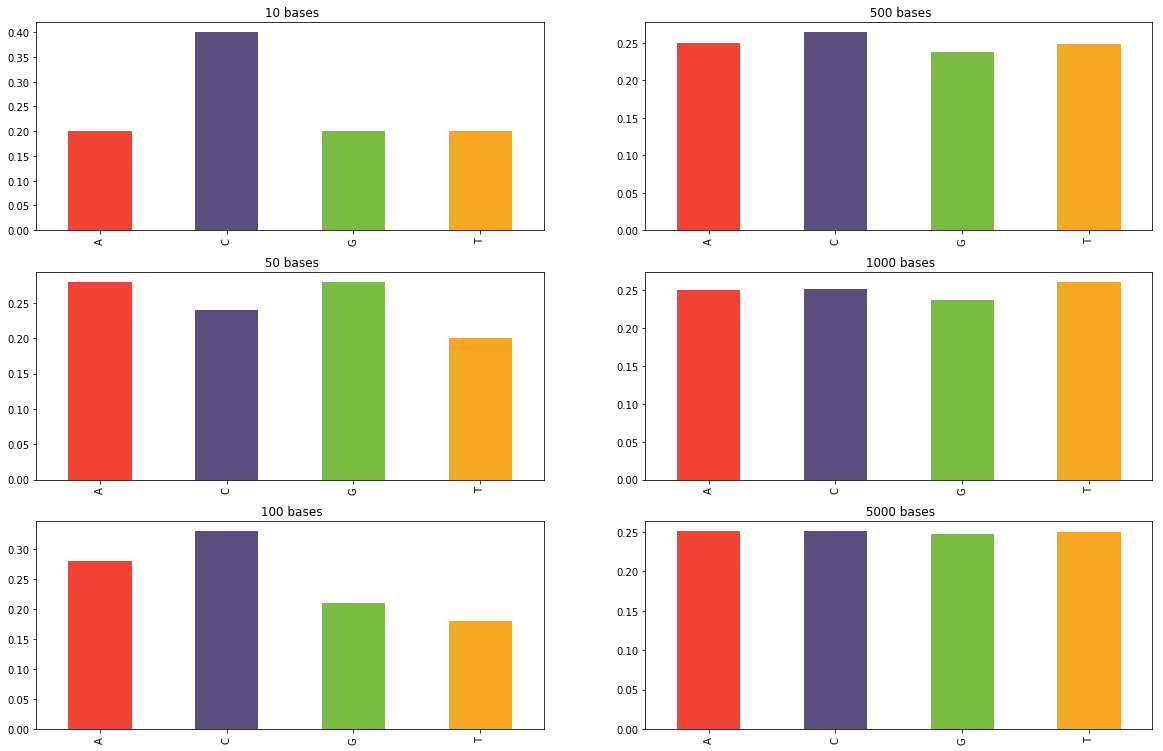

In [4]:
R = [10, 50, 100, 500, 1000, 5000]

figure, axes = plt.subplots(3,2, figsize=(20,13))

states = np.array(["A","C","G","T"])

serie = pd.Series(list(markov_chain(states, transitions,R[-1])))

for index, a in enumerate(np.ravel(axes,order="F")):
    repeat = R[index]
    s = serie[:repeat].value_counts(normalize=True).sort_index()
    a.set_title(f" {repeat} bases")
    s.plot(kind="bar",ax=a, color=["#f14235","#5a4f7c","#7bbb44","#f5a623"])


In [212]:
s.sort_index()

A    0.2528
C    0.2580
G    0.2560
T    0.2332
dtype: float64

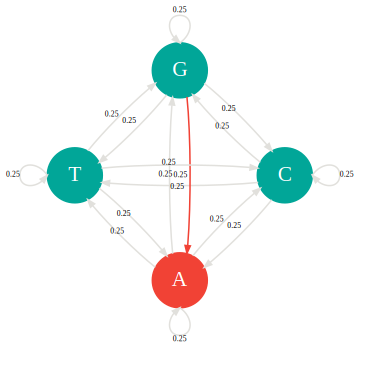

In [69]:
from graphviz import Digraph

def draw_markov(states = ["A","C","G","T"],selected="CG", transition = None, title="sacha", show_label=True):
    
    
    default_transition = np.array([
    #   A     C    G     T
    [0.25, 0.25, 0.25, 0.25],  #A  
    [0.25, 0.25, 0.25, 0.25],  #C
    [0.25, 0.25, 0.25, 0.25],  #G
    [0.25, 0.25, 0.25, 0.25],  #T
    ])
    
    if transition is None:
        transition = default_transition
    
    self_edge_orientations = ["w","n","e","s"]
    mygreen = "#01A698"
    mygray = "#E1E0DC"
    myred = "#f14235"
    
    q = Digraph()
    q.attr("graph",layout="circo",size="5!", margin="0.2", bgcolor="white", fillcolor="white")
    q.attr("node",shape="circle", color=mygreen, style="filled", fontcolor="white")
    q.attr("edge",arrowsize=".5", color=mygray, fontsize="5")
    q.attr("graph",label=title, fontsize="8",fontname="Ubuntu")

    for label in states:
        
        node_color = myred if label == selected[1] else mygreen
        q.node(label, color=node_color)
        
        for other in states:
            edge_color = myred if other+label == selected else mygray
            
            label_index = states.index(label)
            other_index = states.index(other)
            
            edge_value = transition[other_index][label_index]
            
            if not show_label:
                edge_value = ""
            
            if other != label:
                q.edge(other,label, color = edge_color, label=str(edge_value))
                
            else:
                ori = self_edge_orientations.pop()
                q.edge(label+f":{ori}",label+f":{ori}", color=edge_color, label = str(edge_value))

    return q

q = draw_markov(selected="GA", title="")

q.render("transition", format="png")
q

In [269]:
def create_animation(sequence = "ACGGTACGT"):
    
    frames = []
    process_sequence = sequence[0]
    
    
    
    path = draw_markov(selected="NA", title=process_sequence, show_label=True, transition=transitions).render(f"anim_0001", format="png")
    frames.append(Image.open(path))

    
    for index in range(0, len(sequence)-1):
        
        pair = sequence[index: index+2]
        
        process_sequence += sequence[index+1]
        
        path = draw_markov(selected=pair, title=process_sequence, show_label=True,transition=transitions).render(f"anim_{index:04d}", format="png")
        
        frames.append(Image.open(path))
        
   
    


sequence = "".join(list(markov_chain(states, transitions, 30))) 

create_animation(sequence)





In [53]:
i = 3 
print(f"{i:02d}")

03


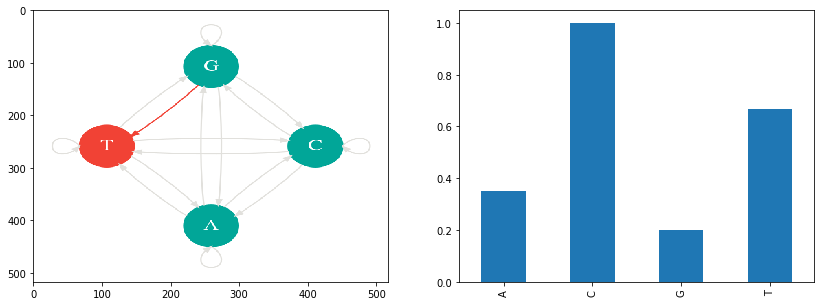

In [39]:

sequence = "".join(list(markov_chain(states, transitions, 1000)))
counter = {"A":0, "C":0,"G":0, "T": 0}

figure, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

for index in range(0, len(sequence)-1):
    
    pair = sequence[index: index+2]
    path = draw_markov(selected=pair, title="", show_label=False).render(f"img{index}", format="png")
    
    counter[sequence[index]] += 1
    total = sum(counter.values())
    
    ax1.imshow(plt.imread(f"img{index}.png"), aspect="auto") 
    
    (pd.Series(counter) / total).plot(kind="bar", ax=ax2)
    
    figure.savefig(f"all{index}.png")
    
    
    if index > 20:
        break
    
    
    
    

    
    
     
     

In [41]:
pd.Series(list(sequence)).value_counts()

C    256
A    252
G    250
T    242
dtype: int64

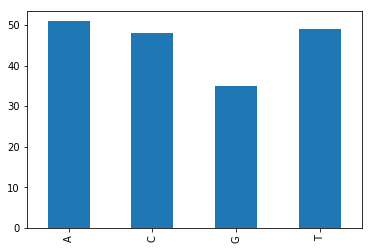

In [36]:
pd.Series(counter).plot(kind="bar")

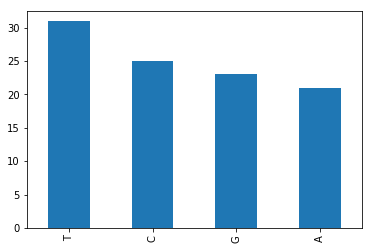

In [17]:
pd.Series(list(sequence)).value_counts().plot(kind="bar")

data_plot = []
i_states = states 
for i in range(10):
    data_plot.append(i_states)
    i_states = i_states.dot(transition)    
    

plt.plot(data_plot)
(i_states)



In [201]:
G = nx.DiGraph()

for index, state in enumerate(states):
    G.add_node(labels[index], index = index)
    
for coord in list(product([0,1,2,3], repeat=2)):
    G.add_edge(labels[coord[0]], labels[coord[1]])
    
nx.write_gml(G,"markov.gml")


In [202]:
np.random.normal(0,1, 10)

array([ 0.57914399,  0.87266845, -1.34185781, -0.72324735,  0.49991282,
        0.09234799, -0.67352519, -0.50632759, -0.53724229,  1.28325745])

In [125]:
list(permutations("ACGT",2,))

[('A', 'C'),
 ('A', 'G'),
 ('A', 'T'),
 ('C', 'A'),
 ('C', 'G'),
 ('C', 'T'),
 ('G', 'A'),
 ('G', 'C'),
 ('G', 'T'),
 ('T', 'A'),
 ('T', 'C'),
 ('T', 'G')]

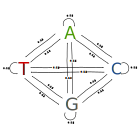

In [8]:
from IPython.core.display import SVG
SVG(filename='markov.svg')

In [14]:
class Markov_chain(object):
    def __init__(self,state, transition):
        self.state = state
        self.transition = transition
        
        

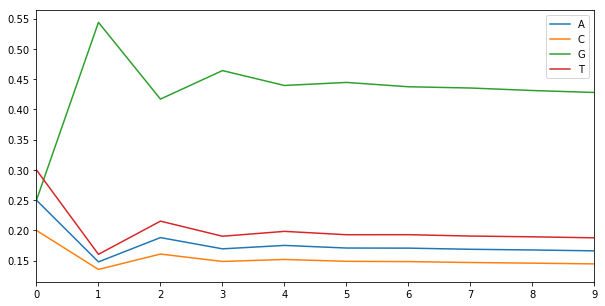

In [8]:
states = np.array([0,0,1,0])
labels = np.array(list("ACGT"))

transition = np.array(
    [
    [0.25, 0.25, 0.25, 0.25],  #A  
    [0.10, 0.10, 0.70, 0.10],  #C
    [0.25, 0.20, 0.25, 0.30],  #G
    [0.01, 0.01, 0.93, 0.01],  #T 
    ])


df = pd.DataFrame( columns=["A","C","G","T"])
for i in range(10):
    
    #df.append(pd.Series(states))
    states = states.dot(transition)
    df = df.append(pd.Series(states, index=["A","C","G","T"]).to_frame().transpose())    
 
df = df.reset_index(drop=True)

df.plot(figsize=(10,5))


In [16]:
Markov_chain(states, transition)

In [29]:
np.random.binomial(1,0.25)

0

In [272]:
mygreen = "#01A698"
mygray = "#E1E0DC"
myred = "#f14235"
    
q = Digraph()
q.attr("graph",size="5!", margin="0.2", bgcolor="white", fillcolor="white",  ranksep= "1.3")
q.attr("node",shape="circle", color=mygreen, style="filled", fontcolor="white")
q.attr("edge",arrowsize=".5", color=mygray, fontsize="5")
#q.attr("graph",label="chaine de markov cachée", fontsize="8",fontname="Ubuntu")



c = Digraph('hidden')
c.attr(rank='same')
c.node("X", color=myred)
c.node("Y", color=myred)

q.subgraph(c)

q.edge("X","Y", label="1/2")
q.edge("Y","X", label = "1/2")

for i in "ACGT":
    q.edge("X", i, "0.25")
    

q.edge("Y", "A", "0.0")
q.edge("Y", "C", "0.0")
q.edge("Y", "T", "0.0")
q.edge("Y", "G", "1.0")



q.render("hmm", format="png")

'hmm.png'